In [17]:
# takes dictionary graph_dict that represents the vertex connections in the graph
# takes a list of list of inclusions, where a subgraph will be counted towards the total if it includes atleast one member from each element in inclusions
# takes a list of exclusions, where a subgraph is not counted if it includes any of the elements in exclusions
# takes an integer limit for how big at maximum the subgraph should be
from time import time

def include_filter(i,j,n,m): return (i >= 0) and (j >= 0) and (i <= (2*n)) and (j <= (2*m)) and (((i+j)%2)==1)

def minimals(graph_dict,inclusions,limit,exclusions=None,show=False,timeit=False):
    if exclusions is None:
        exclusions = []
    inclusions.append([-1])
    total = 0
    subgraphs = graph_dict.connected_subgraph_iterator(k=limit, vertices_only=True)
    for subgraph in subgraphs:
        if len(subgraph) == limit:
            for include in inclusions:
                if include[0] == -1:
                    total += 1
                    if show:
                        # graph_dict.show(vertex_colors = {(0.5,1,1): subgraph})
                        print(graph_dict)
                if not(bool(set(subgraph).intersection(include))): break
                if bool(set(subgraph).intersection(exclusions)): break
    return total


[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)], [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]]


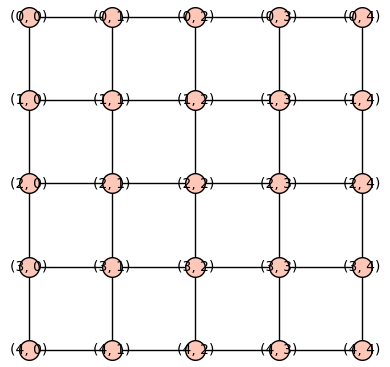

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 0), (3, 0), (4, 0)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (2, 2), (3, 2), (4, 2)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (2, 3), (3, 3), (4, 3)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 3), (3, 3), (4, 3)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 3), (4, 3)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (4, 3)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4)], [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 2), (3, 2), (4, 2)], [(0, 0), (0, 1), (0, 2), (1, 2), (1, 

In [2]:

width = 5
height = 5
graph_dict = graphs.Grid2dGraph(height,width)
inclusions = [
    [(0,i) for i in range(width)],
    [(height-1,i) for i in range(width)],
    [(i,0) for i in range(height)],
    [(i,width-1) for i in range(height)]
]

print(inclusions)

graph_dict.show()

def minimals_list(graph_dict,inclusions,limit,exclusions=None,show=False,timeit=False):
    if exclusions is None:
        exclusions = []
    inclusions.append([-1])
    total_minimals = []
    subgraphs = graph_dict.connected_subgraph_iterator(k=limit, vertices_only=True)
    for subgraph in subgraphs:
        if len(subgraph) == limit:
            for include in inclusions:
                if include[0] == -1:
                    total_minimals.append(subgraph)
                    if show:
                        # graph_dict.show(vertex_colors = {(0.5,1,1): subgraph})
                        print(graph_dict)
                if not(bool(set(subgraph).intersection(include))): break
                if bool(set(subgraph).intersection(exclusions)): break
    return total_minimals

total_minimals = minimals_list(graph_dict, inclusions, width+height-1)
print(total_minimals)


In [ ]:
#takes dictionary X and list of dictionaries Y, returns number of minimal inclusion subgraphs,
#limiting length of subgraph and indicating progress with prog
import numpy as np

def minimals_heatmap(X,Y,limit,w,l):
    def intersect(X,Y):
        return bool(set(X).intersection(Y))

    Y.append([-1])
    total = 0

    count_dict = {}
    for vertex in X.vertices():
        count_dict[vertex] = 0

    while total == 0:
        subgraphs = X.connected_subgraph_iterator(k=limit, vertices_only=True)
        for subgraph in subgraphs:
            if len(subgraph) == limit:
                for include in Y:
                    if include[0] == -1:
                        total +=1
                        for subgraph_vertex in subgraph:
                            count_dict[subgraph_vertex] +=1
                        #X.show(vertex_colors = {(0.5,1,1): subgraph})
                    if not(intersect(subgraph, include)):
                        break
        
    rename_dict = {}
    array = np.zeros((l,w))
    for key, value in count_dict.items():
        rename_dict[key] = (key,value)
        array[key[0]][key[1]] = value
        
    X.relabel(rename_dict)
    print('Total is:',total)
    print(array)
    return X

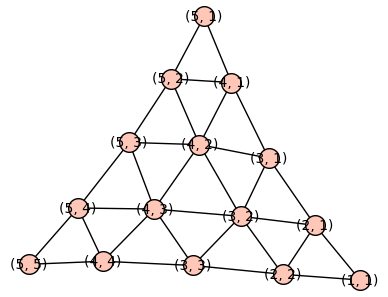

41


In [3]:
def hex_in_tri(n):
    def add_to_dict(dict,key,value):
        try: dict[key].append(value)
        except: dict[key] = [value]

    def add_connections(i,j,n):
        for tup in [(i-1,j-1),(i-1,j),(i,j-1),(i,j+1),(i+1,j),(i+1,j+1)]:
            if tup[0]>=1 and tup[0]<=n and tup[1]>=1 and tup[1]<=n and tup[0]>=tup[1]:
                add_to_dict(return_dict, (i,j), tup)

    return_dict = {}
    for i in range(1, n+1):
        for j in range(1, i+1):
            add_connections(i,j,n)

    inclusions = [[(1,1)],[(n,1)],[(n,n)]]
    limit = (2*n)-1
    return Graph(return_dict), inclusions, limit

result_graph, inclusions, limit = hex_in_tri(5)
result_graph.show()

total_minimals = minimals_list(graph_dict=result_graph, inclusions=inclusions, limit=limit)
print(len(total_minimals))
# print(total_minimals)
# import json
# with open('./hex.json', 'w') as f: json.dump(total_minimals, f)



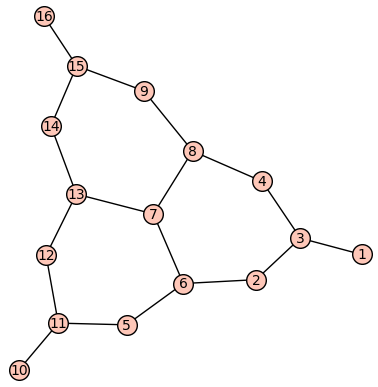

In [2]:
#recursive definition of triangle in triangular grid

def tri_in_tri(n):
    return_dict = {}

    def add_to_dict(dict,key,value):
        try:
            dict[key].append(value)
        except:
            dict[key] = [value]

    def add_connections(i,row):
        if i-1 > (row -1) ** 2 and i-1 > 0:
            add_to_dict(return_dict,i,i-1)
        if i+1 <= row**2 and i+1 <= n **2:
            add_to_dict(return_dict,i,i+1)
        if row % 2 == i % 2 and i + (2*row) <= n**2:
            add_to_dict(return_dict,i,i+(2*row))
        if row % 2 != i % 2 and i-(2*(row-1)) > 0:
            add_to_dict(return_dict,i,i-(2*(row-1)))

    row = 0
    for i in range(1,n**2+1):
        if i**(1/2).n() <= row:
            add_connections(i,row)
        
        else:
            row += 1
            add_connections(i,row)

    return Graph(return_dict)

result_graph = tri_in_tri(4)
result_graph.show()

In [ ]:
print(minimals(tri_in_tri(4),[[1,2,5,10],[1,4,9,16],[10,12,14,16]],7))

In [ ]:
for n in range(2,8):
    tri_graph = tri_in_tri(n)
    inclusions = [[1],[((n-1)**2)+1], [n**2]]
    print(f'# of Minimals for {n} is {minimal_inscribed(tri_graph,inclusions, int(4*(n-1)),int(0))}')

In [ ]:
def tri_in_trihex(n,a):
    return_dict = {}

    def add_to_dict(dict,key,value):
        try:
            dict[key].append(value)
        except:
            dict[key] = [value]

    def add_connections(i,row):
        if i-1 > (row -1) ** 2 and i-1 > 0:
            add_to_dict(return_dict,i,i-1)
        if i+1 <= row**2 and i+1 <= n **2:
            add_to_dict(return_dict,i,i+1)
        if row % 2 == i % 2 and i + (2*row) <= n**2:
            add_to_dict(return_dict,i,i+(2*row))
        if row % 2 != i % 2 and i-(2*(row-1)) > 0:
            add_to_dict(return_dict,i,i-(2*(row-1)))

    row = 0
    for i in range(1,n**2+1):
        if i**(1/2).n() <= row:
            add_connections(i,row)
        
        else:
            row += 1
            add_connections(i,row)

    additions = []
    startingval = 3
    startingjump = 3
    for subrow in range(1,n-1):
        for inc in range(subrow):
            top = startingval+2*inc
            left = startingval+startingjump+2*inc
            right = startingval+startingjump+2*(inc+1)
            additions.append([top, left, right])
            
        startingval += 1 + 2 * subrow
        startingjump += 2

    #add points
    index = n**2+1
    for _ in range(n**2+1, n**2+1+(n-1)*(n-2)/2):
        connects = additions.pop(0)
        add_to_dict(return_dict,index,connects[0])
        add_to_dict(return_dict,index,connects[1])
        add_to_dict(return_dict,index,connects[2])
        if a >= 3:
            for _ in range(a-2):
                index += 1
                add_to_dict(return_dict,index,connects[0])
                add_to_dict(return_dict,index,connects[1])
                index += 1
                add_to_dict(return_dict,index,connects[1])
                add_to_dict(return_dict,index,connects[2])
                index += 1
                add_to_dict(return_dict,index,connects[2])
                add_to_dict(return_dict,index,connects[0])
        index += 1



    return Graph(return_dict)

n=4

result = tri_in_trihex(n,4)
result.show()

In [ ]:

def minimals_in_trihex(n,a,show=False):
    lst = [1]
    for i in range(1,n):
        lst.append(lst[i-1] + (2*i)-1)
    inclusions = [[i**2 for i in range(1,n+1)],[n**2 - (2*i) for i in range(n)],lst]
    exclusions = []
    graph = tri_in_trihex(n,a)
    if show:
        print('inclusions are:',inclusions)
        if len(exclusions) != 0:
            print('exclusions are:',exclusions)
        graph.show()
    print(f'The number of minimals in the {n},{a} trihex is:')
    return minimals(graph, inclusions, (2*n)-1, exclusions)

print(minimals_in_trihex(4,4,show=True))
